# TODO:
### - <s>*Program the VWAP Indicator*</s>
### - <s>*Program the Supertrend Indicator*</s>
### - <s>*Plot and Test if values fit with Tradingview*</s>
### - <s>*Plot the indicators*</s>
### - <s>*Structurize the Strategy for instant usage*</s>
### - <s>*Heikin Ashi Transformer*</s>
### - *Finish the SMC Indicator*
### - *Then Finish the Strategy*
### - *If the Strategy works like wanted:*
- Use some API to retrieve Data
- Structure the code (all in ipynb for testing rn)
- Test the Algo with Machine Learning
### Done
---

## Imports
---

In [234]:
import pandas as pd 
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

from heikin_ashi import heikin_ashi

## Getting the Data
---

In [235]:
data = pd.read_csv("./BTCUSDT-3m-2023-04-30.csv")
data['Opent'] = pd.to_datetime(data['Opent'], unit='ms')
data['Opent'] = data['Opent'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
data.set_index('Opent', inplace=True)

In [236]:
data2 = pd.read_csv("./BTCUSDT-3m-2023-05-04.csv")
data2['Opent'] = pd.to_datetime(data2['Opent'], unit='ms')
data2['Opent'] = data2['Opent'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
data2.set_index('Opent', inplace=True)

In [237]:
# Getting Forex Data via API

#https://www.fxcm.com/markets/algorithmic-trading/market-data/

In [238]:
data2

Open      High       Low     Close     Volume  \
Opent                                                                    
2023-05-04 00:00:00  29026.16  29062.27  29020.00  29060.09  167.33470   
2023-05-04 00:03:00  29060.10  29063.19  29046.02  29047.76   79.49311   
2023-05-04 00:06:00  29047.75  29047.76  29003.37  29020.82  153.37783   
2023-05-04 00:09:00  29020.82  29039.81  28990.90  29039.81   96.86582   
2023-05-04 00:12:00  29039.80  29085.69  29039.80  29080.05  111.48081   
...                       ...       ...       ...       ...        ...   
2023-05-04 23:45:00  28811.58  28820.70  28808.19  28820.68   19.60646   
2023-05-04 23:48:00  28820.69  28836.22  28820.68  28836.22   29.54833   
2023-05-04 23:51:00  28836.21  28836.22  28830.64  28834.85   27.99093   
2023-05-04 23:54:00  28834.85  28834.85  28820.68  28826.49   23.66563   
2023-05-04 23:57:00  28826.48  28838.17  28826.48  28838.16   11.88684   

                        Close time   Volume pair  TradeNr    useless  \
Opent                                                                  
2023-05-04 00:00:00  1683158579999  4.859000e+06     3270  113.20887   
2023-05-04 00:03:00  1683158759999  2.309657e+06     1949   42.87514   
2023-05-04 00:06:00  1683158939999  4.450671e+06     2626   86.79922   
2023-05-04 00:09:00  1683159119999  2.810214e+06     2386   49.41884   
2023-05-04 00:12:00  1683159299999  3.241152e+06     2524   62.46409   
...                            ...           ...      ...        ...   
2023-05-04 23:45:00  1683244079999  5.649318e+05      719   11.51928   
2023-05-04 23:48:00  1683244259999  8.517463e+05      805   22.98839   
2023-05-04 23:51:00  1683244439999  8.070824e+05      800    9.84345   
2023-05-04 23:54:00  1683244619999  6.822029e+05      940    8.26242   
2023-05-04 23:57:00  1683244799999  3.427193e+05      610    9.26992   

                         useless2  nothing  
Opent                                       
2023-05-04 00:00:00  3.287392e+06        0  
2023-05-04 00:03:00  1.245679e+06        0  
2023-05-04 00:06:00  2.518584e+06        0  
2023-05-04 00:09:00  1.433736e+06        0  
2023-05-04 00:12:00  1.815936e+06        0  
...                           ...      ...  
2023-05-04 23:45:00  3.318844e+05        0  
2023-05-04 23:48:00  6.626613e+05        0  
2023-05-04 23:51:00  2.838206e+05        0  
2023-05-04 23:54:00  2.381500e+05        0  
2023-05-04 23:57:00  2.672684e+05        0  

[480 rows x 11 columns]

## VWAP
---
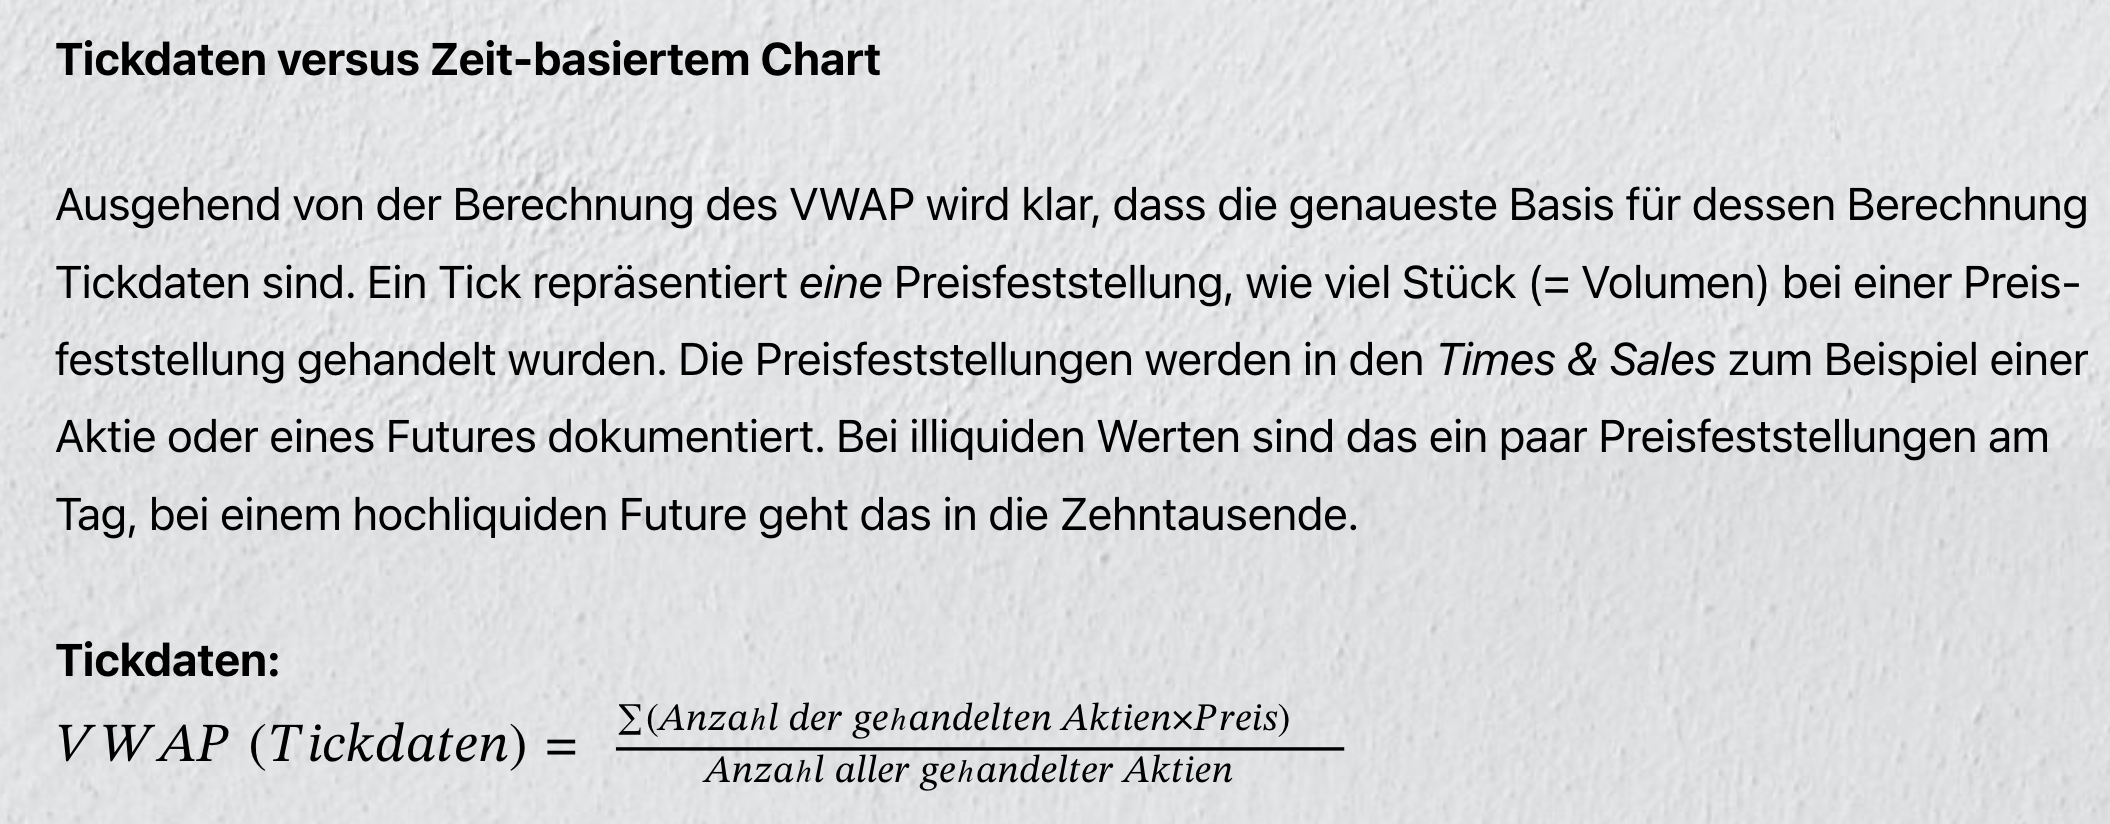
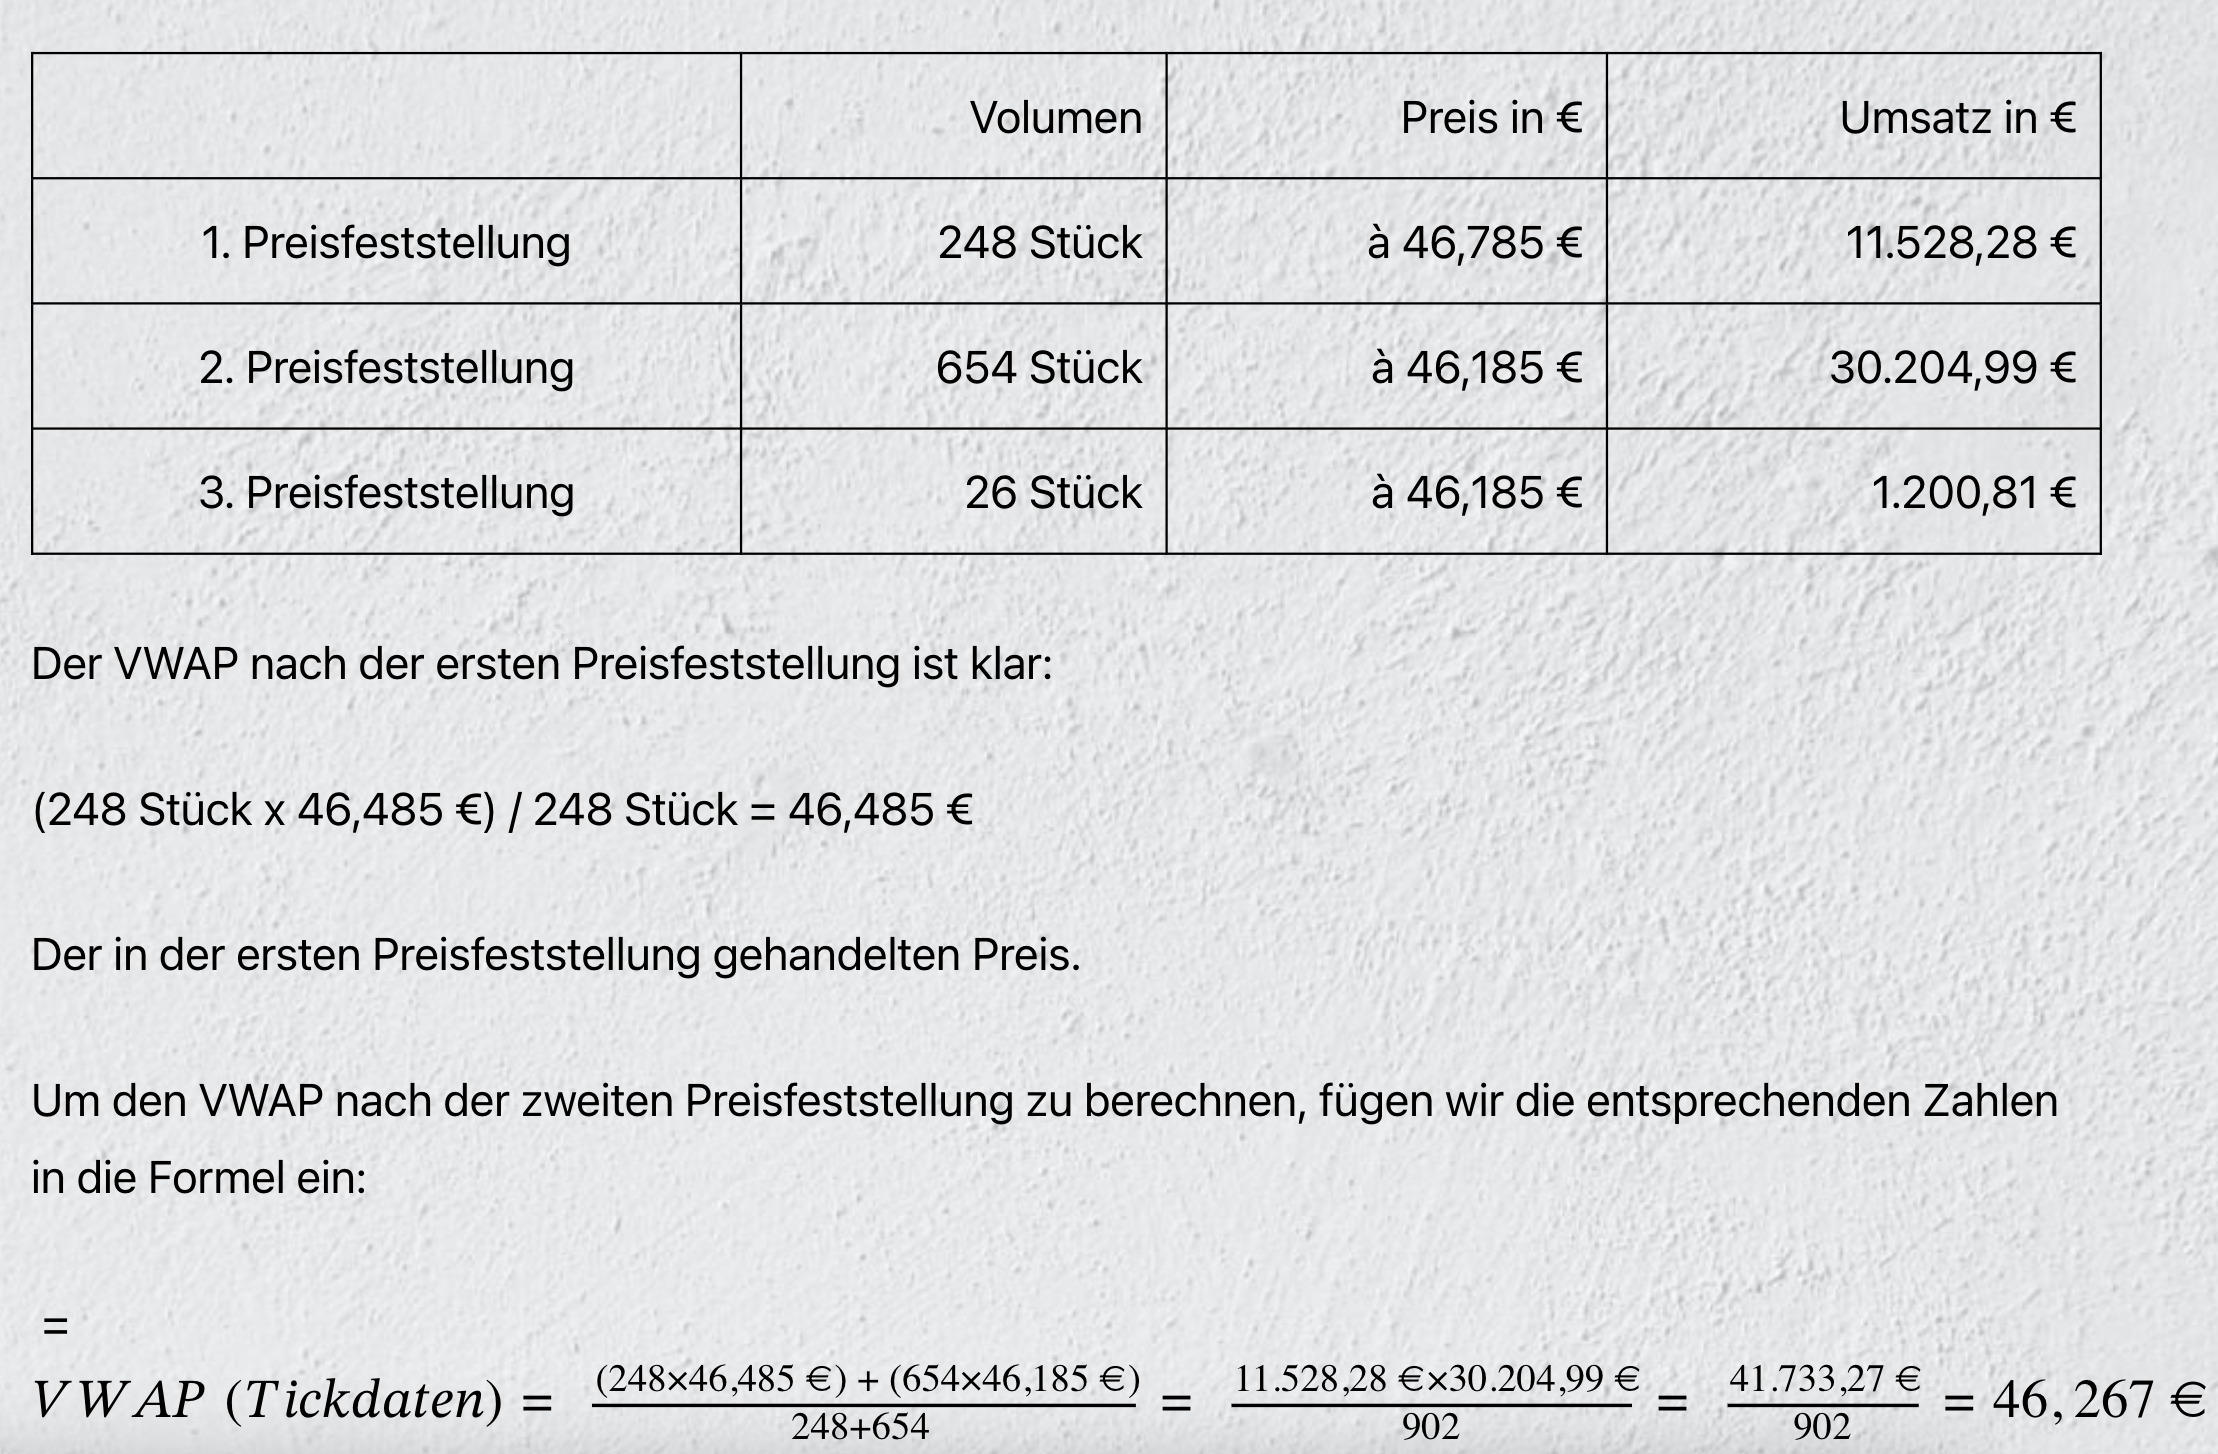

In [239]:
data

Open      High       Low     Close     Volume  \
Opent                                                                    
2023-04-30 00:00:00  29230.45  29230.49  29226.51  29226.51   27.31090   
2023-04-30 00:03:00  29226.52  29226.52  29224.22  29224.23   20.29375   
2023-04-30 00:06:00  29224.22  29224.23  29210.53  29214.54   37.72225   
2023-04-30 00:09:00  29214.54  29223.28  29213.01  29213.02   17.10613   
2023-04-30 00:12:00  29213.02  29217.23  29213.01  29213.02   21.45128   
...                       ...       ...       ...       ...        ...   
2023-04-30 23:45:00  29392.33  29392.34  29343.27  29343.27   42.66521   
2023-04-30 23:48:00  29343.27  29351.42  29293.84  29316.92  165.68337   
2023-04-30 23:51:00  29316.92  29344.78  29306.53  29306.53  102.66224   
2023-04-30 23:54:00  29306.54  29317.77  29293.81  29297.71   86.74803   
2023-04-30 23:57:00  29297.71  29297.71  29177.92  29233.21  452.53804   

                        Close time   Volume pair  TradeNr    useless  \
Opent                                                                  
2023-04-30 00:00:00  1682812979999  7.982928e+05     1092    7.00785   
2023-04-30 00:03:00  1682813159999  5.931144e+05      896    5.62308   
2023-04-30 00:06:00  1682813339999  1.102187e+06     1289   10.70671   
2023-04-30 00:09:00  1682813519999  4.997941e+05     1021    5.44545   
2023-04-30 00:12:00  1682813699999  6.266831e+05      971   13.73436   
...                            ...           ...      ...        ...   
2023-04-30 23:45:00  1682898479999  1.253194e+06     1541   18.35114   
2023-04-30 23:48:00  1682898659999  4.857319e+06     4768   71.05387   
2023-04-30 23:51:00  1682898839999  3.010579e+06     2181   36.08370   
2023-04-30 23:54:00  1682899019999  2.542106e+06     1947   43.84626   
2023-04-30 23:57:00  1682899199999  1.323048e+07     7865  135.62442   

                         useless2  nothing  
Opent                                       
2023-04-30 00:00:00  2.048399e+05        0  
2023-04-30 00:03:00  1.643428e+05        0  
2023-04-30 00:06:00  3.128423e+05        0  
2023-04-30 00:09:00  1.591043e+05        0  
2023-04-30 00:12:00  4.012334e+05        0  
...                           ...      ...  
2023-04-30 23:45:00  5.390929e+05        0  
2023-04-30 23:48:00  2.082841e+06        0  
2023-04-30 23:51:00  1.058252e+06        0  
2023-04-30 23:54:00  1.284852e+06        0  
2023-04-30 23:57:00  3.965759e+06        0  

[480 rows x 11 columns]

In [273]:
def VWAP2(df: pd.DataFrame):
    df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['TradedValue'] = df['TP'] * df['Volume']
    df['CumulativeTradedValue'] = df['TradedValue'].cumsum()
    df['CumulativeVolume'] = df['Volume'].cumsum()
    df['VWAP'] = df['CumulativeTradedValue'] / df['CumulativeVolume']
    
    df['TypicalPriceDev'] = (df['Close'] - df['VWAP'])**2
    df['TPVDev'] = df['TypicalPriceDev'] * df['Volume']
    df['CumTPVDev'] = df['TPVDev'].cumsum()
    df['VWAPStdev'] = np.sqrt(df['CumTPVDev'] / df['CumulativeVolume'])


    # calculate upper and lower bands
    df['UpperBand1'] = df['VWAP'] + 1 * df['VWAPStdev']
    df['LowerBand1'] = df['VWAP'] - 1 * df['VWAPStdev']
    df['UpperBand2'] = df['VWAP'] + 2 * df['VWAPStdev']
    df['LowerBand2'] = df['VWAP'] - 2 * df['VWAPStdev']
    df['UpperBand3'] = df['VWAP'] + 3 * df['VWAPStdev']
    df['LowerBand3'] = df['VWAP'] - 3 * df['VWAPStdev']
    return [df['VWAP'], df['UpperBand1'], df['LowerBand1'], df['UpperBand2'], df['LowerBand2'], df['UpperBand3'], df['LowerBand3']]

VWAP2(data2)

[Opent
 2023-05-04 00:00:00    29047.453333
 2023-05-04 00:03:00    29049.021761
 2023-05-04 00:06:00    29039.425845
 2023-05-04 00:09:00    29036.323626
 2023-05-04 00:12:00    29042.220465
                            ...     
 2023-05-04 23:45:00    28980.292637
 2023-05-04 23:48:00    28980.188898
 2023-05-04 23:51:00    28980.092643
 2023-05-04 23:54:00    28980.007712
 2023-05-04 23:57:00    28979.967023
 Name: VWAP, Length: 480, dtype: float64,
 Opent
 2023-05-04 00:00:00    29060.090000
 2023-05-04 00:03:00    29059.451045
 2023-05-04 00:06:00    29053.559344
 2023-05-04 00:09:00    29049.098501
 2023-05-04 00:12:00    29062.106640
                            ...     
 2023-05-04 23:45:00    29138.609299
 2023-05-04 23:48:00    29138.496039
 2023-05-04 23:51:00    29138.391542
 2023-05-04 23:54:00    29138.303993
 2023-05-04 23:57:00    29138.258939
 Name: UpperBand1, Length: 480, dtype: float64,
 Opent
 2023-05-04 00:00:00    29034.816667
 2023-05-04 00:03:00    29038.592476
 

# Supertrend
---
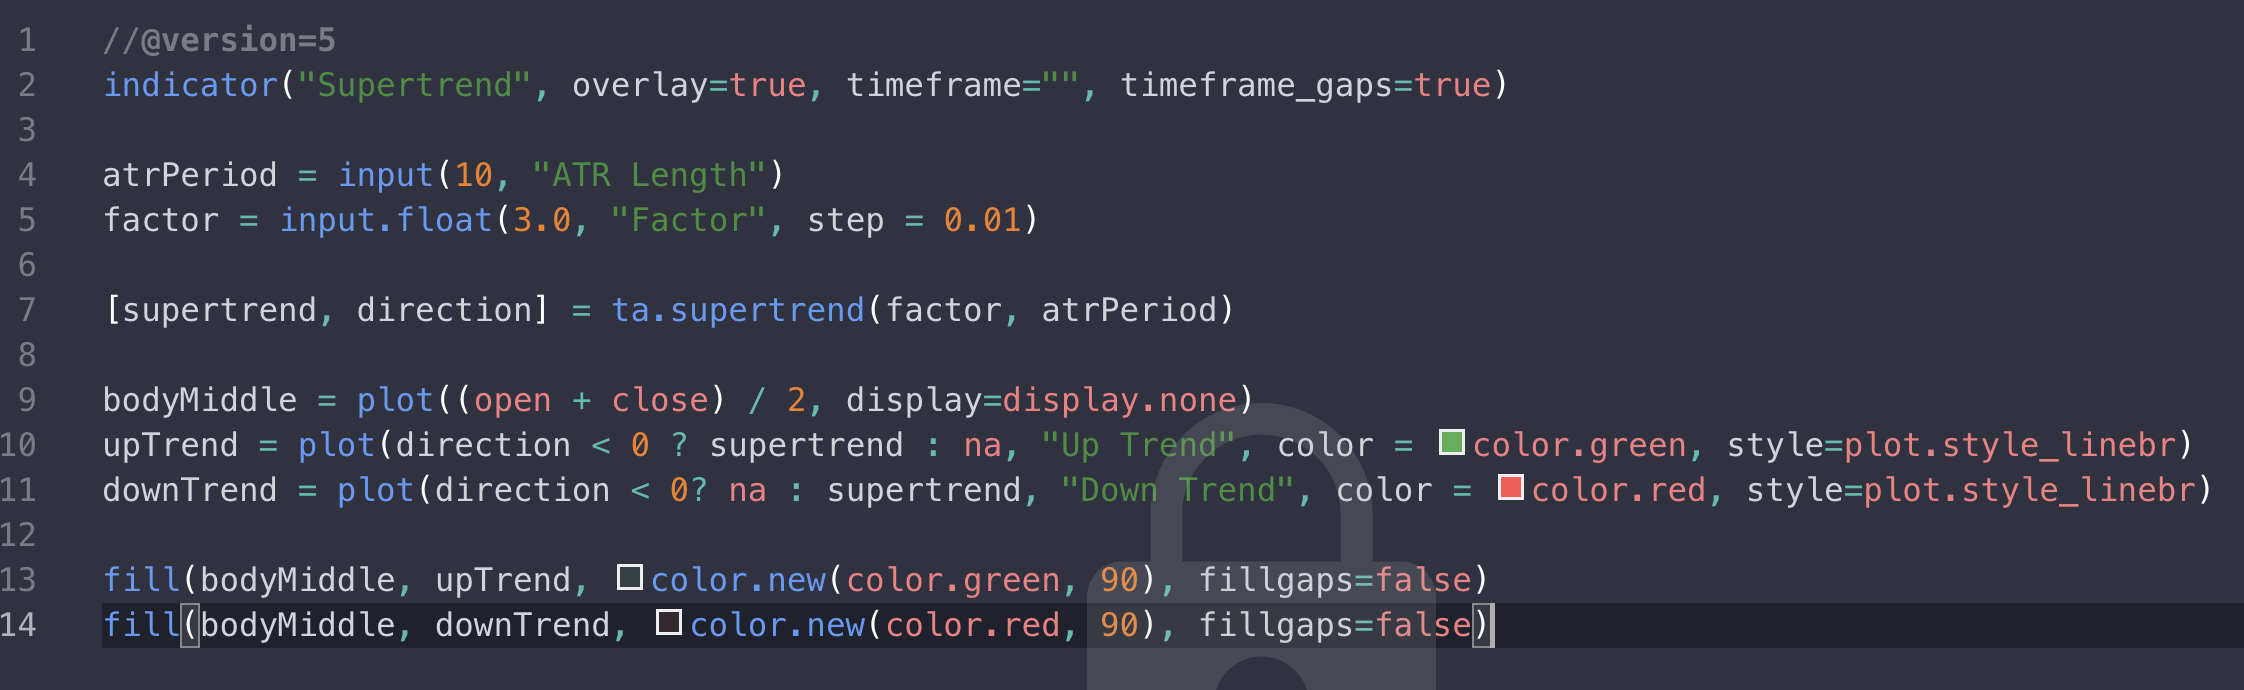
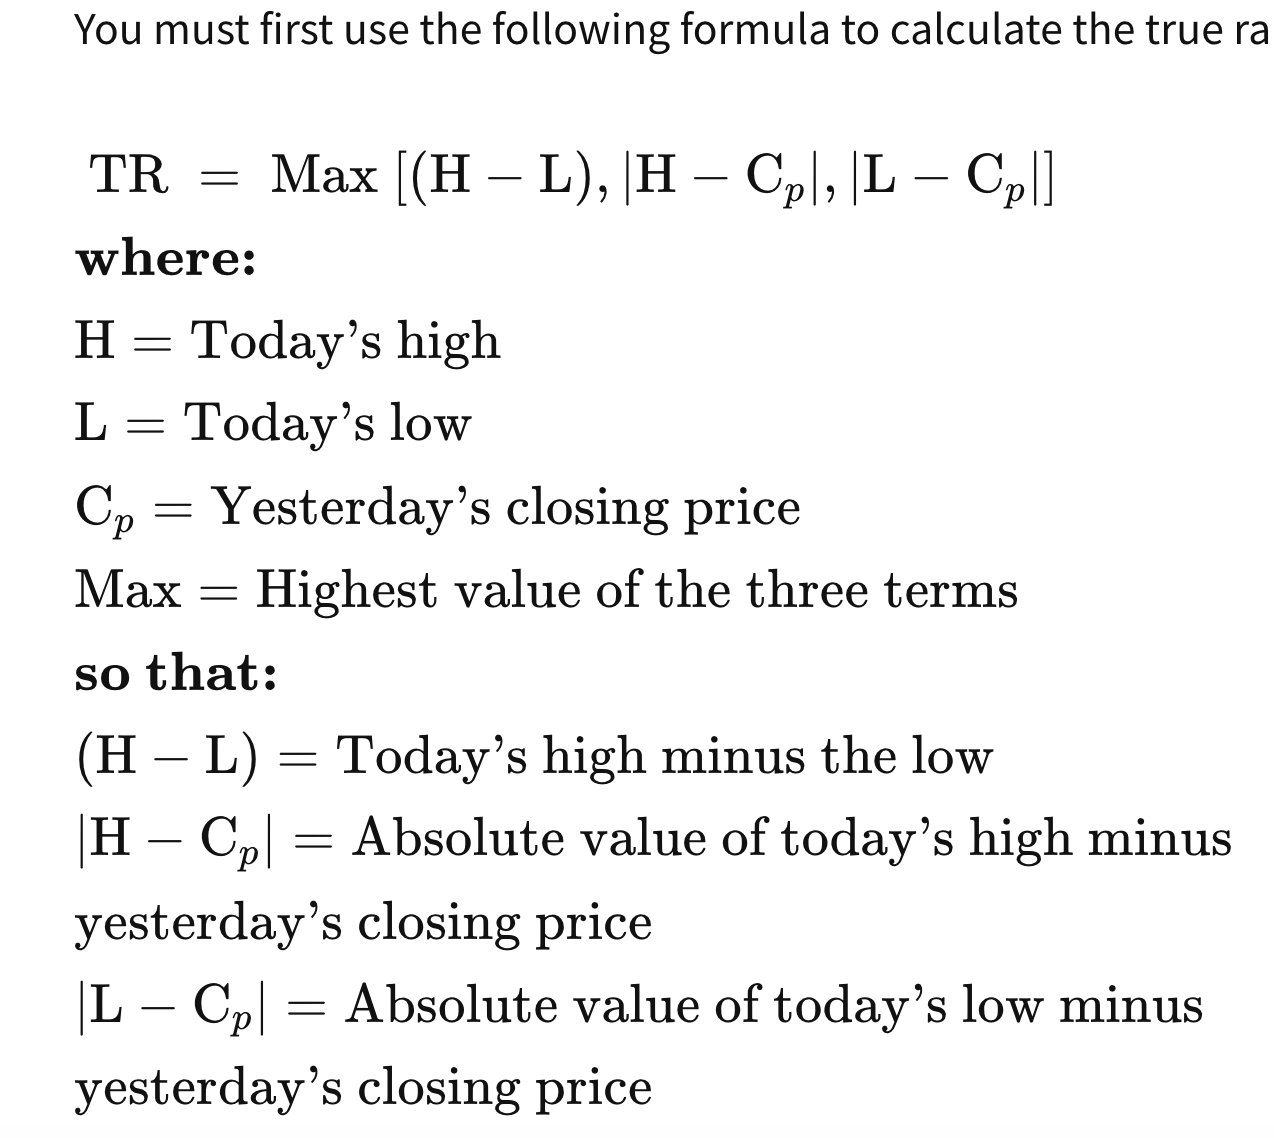
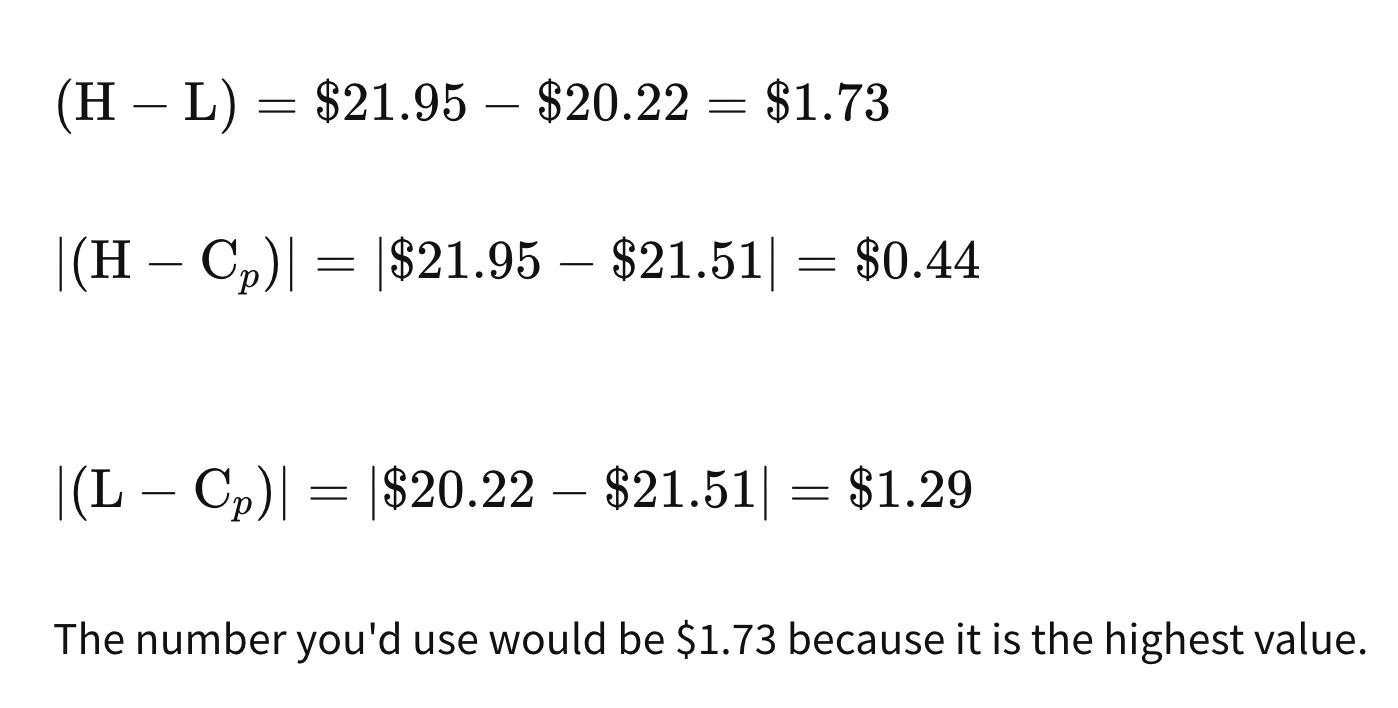

In [241]:
def get_supertrend(high, low, close, lookback, multiplier):
    
    # ATR
    
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift(1)))
    tr3 = pd.DataFrame(abs(low - close.shift(1)))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.ewm(lookback).mean()
    
    # H/L AVG AND BASIC UPPER & LOWER BAND
    
    hl_avg = (high + low) / 2
    upper_band = (hl_avg + multiplier * atr).dropna()
    lower_band = (hl_avg - multiplier * atr).dropna()
    
    # FINAL UPPER BAND
    final_bands = pd.DataFrame(columns = ['upper', 'lower'])
    final_bands.iloc[:,0] = [x for x in upper_band - upper_band]
    final_bands.iloc[:,1] = final_bands.iloc[:,0]
    for i in range(len(final_bands)):
        if i == 0:
            final_bands.iloc[i,0] = 0
        else:
            if (upper_band[i] < final_bands.iloc[i-1,0]) | (close[i-1] > final_bands.iloc[i-1,0]):
                final_bands.iloc[i,0] = upper_band[i]
            else:
                final_bands.iloc[i,0] = final_bands.iloc[i-1,0]
    
    # FINAL LOWER BAND
    
    for i in range(len(final_bands)):
        if i == 0:
            final_bands.iloc[i, 1] = 0
        else:
            if (lower_band[i] > final_bands.iloc[i-1,1]) | (close[i-1] < final_bands.iloc[i-1,1]):
                final_bands.iloc[i,1] = lower_band[i]
            else:
                final_bands.iloc[i,1] = final_bands.iloc[i-1,1]
    
    # SUPERTREND
    
    supertrend = pd.DataFrame(columns = [f'supertrend_{lookback}'])
    supertrend.iloc[:,0] = [x for x in final_bands['upper'] - final_bands['upper']]
    
    for i in range(len(supertrend)):
        if i == 0:
            supertrend.iloc[i, 0] = 0
        elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] < final_bands.iloc[i, 0]:
            supertrend.iloc[i, 0] = final_bands.iloc[i, 0]
        elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] > final_bands.iloc[i, 0]:
            supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
        elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] > final_bands.iloc[i, 1]:
            supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
        elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] < final_bands.iloc[i, 1]:
            supertrend.iloc[i, 0] = final_bands.iloc[i, 0]
    
    supertrend = supertrend.set_index(upper_band.index)
    supertrend = supertrend.dropna()[1:]
    
    # ST UPTREND/DOWNTREND
    
    upt = []
    dt = []
    close = close.iloc[len(close) - len(supertrend):]

    for i in range(len(supertrend)):
        if close[i] > supertrend.iloc[i, 0]:
            upt.append(supertrend.iloc[i, 0])
            dt.append(np.nan)
        elif close[i] < supertrend.iloc[i, 0]:
            upt.append(np.nan)
            dt.append(supertrend.iloc[i, 0])
        else:
            upt.append(np.nan)
            dt.append(np.nan)
            
    st, upt, dt = pd.Series(supertrend.iloc[:, 0]), pd.Series(upt), pd.Series(dt)
    upt.index, dt.index = supertrend.index, supertrend.index
    return st, upt, dt

data["lower_st"] = get_supertrend(data["High"], data["Low"], data["Close"], 10, 2.5)[1]
data["upper_st"] = get_supertrend(data["High"], data["Low"], data["Close"], 10, 2.5)[2]

In [274]:
data2["LowerBand2"].iloc[260:292]

Opent
2023-05-04 13:00:00    28948.218210
2023-05-04 13:03:00    28948.342755
2023-05-04 13:06:00    28948.398052
2023-05-04 13:09:00    28948.433514
2023-05-04 13:12:00    28948.430189
2023-05-04 13:15:00    28948.224958
2023-05-04 13:18:00    28918.712607
2023-05-04 13:21:00    28913.016865
2023-05-04 13:24:00    28906.619578
2023-05-04 13:27:00    28898.996226
2023-05-04 13:30:00    28894.001511
2023-05-04 13:33:00    28887.292164
2023-05-04 13:36:00    28861.729547
2023-05-04 13:39:00    28815.363670
2023-05-04 13:42:00    28794.850847
2023-05-04 13:45:00    28788.686382
2023-05-04 13:48:00    28781.048169
2023-05-04 13:51:00    28776.565126
2023-05-04 13:54:00    28773.859961
2023-05-04 13:57:00    28770.015978
2023-05-04 14:00:00    28767.056568
2023-05-04 14:03:00    28761.986233
2023-05-04 14:06:00    28756.399606
2023-05-04 14:09:00    28753.405831
2023-05-04 14:12:00    28751.840992
2023-05-04 14:15:00    28747.013944
2023-05-04 14:18:00    28744.231024
2023-05-04 14:21:00   

# CHECKED

The supertrend Indicator works excatly the same like in tradingview

## Plots:
---

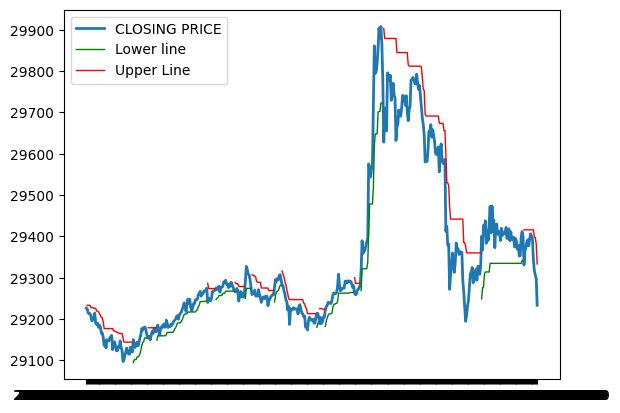

In [243]:
plt.plot(data['Close'], linewidth = 2, label = 'CLOSING PRICE')
plt.plot(data['lower_st'], color = 'green', linewidth = 1, label = 'Lower line')
plt.plot(data['upper_st'], color = 'r', linewidth = 1, label = 'Upper Line')
plt.legend(loc = 'upper left')
plt.show()

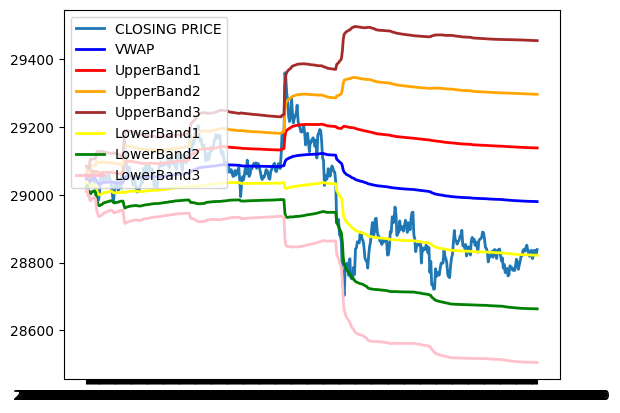

In [275]:
plt.plot(data2['Close'], linewidth = 2, label = 'CLOSING PRICE')
plt.plot(data2['VWAP'], color = 'blue', linewidth = 2, label = 'VWAP')
plt.plot(data2['UpperBand1'], color = 'red', linewidth = 2, label = 'UpperBand1')
plt.plot(data2['UpperBand2'], color = 'orange', linewidth = 2, label = 'UpperBand2')
plt.plot(data2['UpperBand3'], color = 'brown', linewidth = 2, label = 'UpperBand3')
plt.plot(data2['LowerBand1'], color = 'yellow', linewidth = 2, label = 'LowerBand1')
plt.plot(data2['LowerBand2'], color = 'green', linewidth = 2, label = 'LowerBand2')
plt.plot(data2['LowerBand3'], color = 'pink', linewidth = 2, label = 'LowerBand3')
plt.legend(loc = 'upper left')
plt.show()

## The Smart Money Concept Order Block Indicator
---

    1:15 oben -> 25
    1:27 unten -> 29
    4:33 oben -> 91
    5:09 unten -> 103
    6:00 oben -> 120
    6:57 oben -> 139
    8:09 oben -> 163
    8:15 unten -> 165
    10:09 unten -> 203
    11:12 oben -> 224
    12:06 oben -> 243
    13:06 oben -> 263
    14:06 unten -> 283
    16:03 unten -> 321
    17:00 unten -> 340
    17:18 oben -> 346
    18:06 oben -> 362
    18:39 oben -> 373
    19:15 unten -> 385
    19:42 unten -> 394
    20:00 oben -> 400
    21:06 oben -> 422
    21:42 oben -> 434
    23:45 unten -> 475

In [278]:
import pandas as pd
import numpy as np

def swings(data, length):
    upper = data['High'].rolling(window=length).max()
    lower = data['Low'].rolling(window=length).min()

    os = np.where(data['High'].shift(length) > upper, 0, np.where(data['Low'].shift(length) < lower, 1, np.nan))
    os = pd.Series(os).fillna(method='ffill')
    top = np.where((os == 0) & (os.shift() != 0), data['High'].shift(length), 0)
    btm = np.where((os == 1) & (os.shift() != 1), data['Low'].shift(length), 0)
    return [pd.Series(top).shift(-length), pd.Series(btm).shift(-length)]


swings(data2, 20)

swings_data = swings(data2, 15)[1]
for i in range(len(swings_data)):
    if swings_data[i] > 0:
        print(str(i)+"  "+str(swings_data[i]))
    


13  28950.98
29  28975.0
59  28991.35
103  29057.82
131  29090.56
165  28982.58
174  29032.07
191  29035.26
273  28663.64
321  28795.01
370  28673.59
427  28784.25
445  28748.0


In [255]:
data2["UpperBand2"].iloc[200:220]

Opent
2023-05-04 10:00:00    29172.450252
2023-05-04 10:03:00    29172.216101
2023-05-04 10:06:00    29171.962567
2023-05-04 10:09:00    29171.725552
2023-05-04 10:12:00    29171.518497
2023-05-04 10:15:00    29171.326316
2023-05-04 10:18:00    29171.123435
2023-05-04 10:21:00    29171.441774
2023-05-04 10:24:00    29173.214115
2023-05-04 10:27:00    29174.181365
2023-05-04 10:30:00    29175.690339
2023-05-04 10:33:00    29190.253591
2023-05-04 10:36:00    29203.137501
2023-05-04 10:39:00    29209.790563
2023-05-04 10:42:00    29213.954503
2023-05-04 10:45:00    29218.279621
2023-05-04 10:48:00    29220.509186
2023-05-04 10:51:00    29222.731270
2023-05-04 10:54:00    29226.241735
2023-05-04 10:57:00    29229.806938
Name: UpperBand2, dtype: float64

## The Strategy
---

Open      High       Low     Close     Volume  \
Opent                                                                    
2023-05-04 00:00:00  29026.16  29062.27  29020.00  29060.09  167.33470   
2023-05-04 00:03:00  29060.10  29063.19  29046.02  29047.76   79.49311   
2023-05-04 00:06:00  29047.75  29047.76  29003.37  29020.82  153.37783   
2023-05-04 00:09:00  29020.82  29039.81  28990.90  29039.81   96.86582   
2023-05-04 00:12:00  29039.80  29085.69  29039.80  29080.05  111.48081   
2023-05-04 00:15:00  29080.05  29082.62  29053.17  29071.38   61.71284   
2023-05-04 00:18:00  29071.38  29104.27  29039.74  29039.74  134.78043   
2023-05-04 00:21:00  29039.75  29071.51  29039.74  29070.87   36.40089   
2023-05-04 00:24:00  29070.87  29074.77  29052.42  29068.16   59.29458   
2023-05-04 00:27:00  29068.16  29068.17  29036.45  29036.96   50.96540   

                        Close time   Volume pair  TradeNr    useless  \
Opent                                                                  
2023-05-04 00:00:00  1683158579999  4.859000e+06     3270  113.20887   
2023-05-04 00:03:00  1683158759999  2.309657e+06     1949   42.87514   
2023-05-04 00:06:00  1683158939999  4.450671e+06     2626   86.79922   
2023-05-04 00:09:00  1683159119999  2.810214e+06     2386   49.41884   
2023-05-04 00:12:00  1683159299999  3.241152e+06     2524   62.46409   
2023-05-04 00:15:00  1683159479999  1.793729e+06     1593   26.83318   
2023-05-04 00:18:00  1683159659999  3.918743e+06     2837   65.73313   
2023-05-04 00:21:00  1683159839999  1.057963e+06     1454   23.56960   
2023-05-04 00:24:00  1683160019999  1.723206e+06     1576   40.74513   
2023-05-04 00:27:00  1683160199999  1.480550e+06     1364   21.93466   

                         useless2  nothing  atr  top  btm  itop  ibtm  SMA  \
Opent                                                                        
2023-05-04 00:00:00  3.287392e+06        0  NaN  NaN  0.0   NaN   NaN  NaN   
2023-05-04 00:03:00  1.245679e+06        0  NaN  NaN  0.0   NaN   NaN  NaN   
2023-05-04 00:06:00  2.518584e+06        0  NaN  NaN  0.0   NaN   NaN  NaN   
2023-05-04 00:09:00  1.433736e+06        0  NaN  NaN  0.0   NaN   NaN  NaN   
2023-05-04 00:12:00  1.815936e+06        0  NaN  NaN  0.0   NaN   NaN  NaN   
2023-05-04 00:15:00  7.799164e+05        0  NaN  NaN  0.0   NaN   NaN  NaN   
2023-05-04 00:18:00  1.911036e+06        0  NaN  NaN  0.0   NaN   NaN  NaN   
2023-05-04 00:21:00  6.849771e+05        0  NaN  NaN  0.0   NaN   NaN  NaN   
2023-05-04 00:24:00  1.184144e+06        0  NaN  NaN  0.0   NaN   NaN  NaN   
2023-05-04 00:27:00  6.371518e+05        0  NaN  NaN  0.0   NaN   NaN  NaN   

                     TopSwing  BottomSwing  itops  
Opent                                              
2023-05-04 00:00:00         0            0    NaN  
2023-05-04 00:03:00         0            0    NaN  
2023-05-04 00:06:00         0            0    NaN  
2023-05-04 00:09:00         0            0    NaN  
2023-05-04 00:12:00         0            0    NaN  
2023-05-04 00:15:00         0            0    NaN  
2023-05-04 00:18:00         0            0    NaN  
2023-05-04 00:21:00         0            0    NaN  
2023-05-04 00:24:00         0            0    NaN  
2023-05-04 00:27:00         0            0    NaN

In [ ]:
def print_results_for_symbols(symbols, class_name):
    results = []
    avg_annual_return = 0
    avg_annual_volatility = 0
    avg_sharpe_ratio = 0
    avg_calmar_ratio = 0
    total_trades = 0
    avg_return = 0
    avg_trade = 0
    procent = 0
    winrate = 0
    best_trade = 0
    worst_trade = 0
    # Loop through each symbol
    for symbol in symbols:
        try:
            # Download the historical data for the current symbol
            df = yf.download(symbol, period="2y", interval="1h", progress=False)
            # Create a Backtest object with the SimpleStrategy and the current symbol
            bt = Backtest(df, class_name, cash=100000, commission=0.002, exclusive_orders=True)
            # Run the backtest and append the results to the list
            results.append(bt.run())
            # Calculate the average return of all symbols
        except:
            print(f"Error with symbol {symbol}")
            continue
    
    for result in results: 
        winrate += result["Win Rate [%]"] / result["# Trades"]
        print(result["Win Rate [%]"])
        if result["Best Trade [%]"] > best_trade:
            best_trade = result["Best Trade [%]"]
        if result["Worst Trade [%]"] < worst_trade:
            worst_trade = result["Worst Trade [%]"]
        current_trades = result["# Trades"]
        total_trades += current_trades
        current_return = result["Return [%]"]
        procent = ((1 + procent/100) * (1 + current_return/100) - 1)*100
        avg_return += current_return
        avg_annual_return += result["Return (Ann.) [%]"]
        avg_annual_volatility += result["Volatility (Ann.) [%]"]
        avg_sharpe_ratio += result["Sharpe Ratio"]
        avg_calmar_ratio += result["Calmar Ratio"]
        avg_trade += (1+procent/100)**(1/current_trades)-1


    avg_annual_return = avg_annual_return / len(results)
    avg_annual_volatility = avg_annual_volatility / len(results)
    avg_sharpe_ratio = avg_sharpe_ratio / len(results)
    avg_calmar_ratio =avg_calmar_ratio / len(results)
    avg_return = avg_return / len(results)
    avg_trade = avg_trade / len(results)
    winrate = winrate * total_trades

    print(f"Winrate: {winrate:.4f}%")
    print(f"Best Trade: {best_trade:.4f}%")
    print(f"Worst Trade: {worst_trade:.4f}%")
    print(f"Average Return: {avg_return:.4f}%")
    print(f"Average Annual Return: {avg_annual_return:.4f}%")
    print(f"Average Annual Volatility: {avg_annual_volatility:.4f}%")
    print(f"Average Sharpe Ratio: {avg_sharpe_ratio:.4f}")
    print(f"Average Calmar Ratio: {avg_calmar_ratio:.4f}")
    print(f"Total Trades: {total_trades}")
    print(f"Average Trade P/L: {avg_trade*100:.4f}%")
    print(f"Overall Profit: {procent:.4f}%")

In [ ]:
# TODO use backtesting.py to backtest the strategy
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

class PIES(Strategy):
    n1 = 100

    def init(self):
        self.trade_opened = False
        self.stoploss = 0
        self.sholong = 0  #0 stands for long trade and 1 for short trade
        self.target = 0
        self.vwap = VWAP2(data)[0]
        self.vwapu1 = VWAP2(data)[1]
        self.vwapl1 = VWAP2(data)[2]
        self.vwapu2 = VWAP2(data)[3]
        self.vwapl2 = VWAP2(data)[4]
        self.vwapu3 = VWAP2(data)[5]
        self.vwapl3 = VWAP2(data)[6]
        self.supertrendl = get_supertrend(data["High"], data["Low"], data["Close"], 10, 2.5)[1]
        self.supertrendu = get_supertrend(data["High"], data["Low"], data["Close"], 10, 2.5)[2]

    def next(self):
        if not self.trade_opened:
            pass

bt = Backtest(data, PIES, cash=100000, commission=0.002, exclusive_orders=True)
# Run the backtest and append the results to the list
output = bt.run()
output


/Users/dennisschielke/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/6k/qhxq2vds24v690rsqtznkwqm0000gn/T/ipykernel_72777/946262436.py:27: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(data, PIES, cash=100000, commission=0.002, exclusive_orders=True)


TypeError: unsupported operand type(s) for -: 'str' and 'str'